In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Load the data
df = pd.read_excel("./data/FINAL_DATASET.xlsx")

for name in df.columns:
    newname = name
    # remove alla characted within two []
    while "[" in newname:
        start = newname.find("[")
        end = newname.find("]")
        newname = newname[:start] + newname[end+1:]
    # remove end spaces and beginning spaces
    newname = newname.strip()
    # remove all mathematical oipreators caharacters and spaces
    #newname = newname.replace(" ", "_")
    #newname = newname.replace(">", "gt")
    #newname = newname.replace("<", "lt")
    #newname = newname.replace("=", "eq")
    #newname = newname.replace("+", "plus")
    #newname = newname.replace("-", "minus")
    #newname = newname.replace("*", "times")
    #newname = newname.replace("/", "div")
    # rename columns in the dataframe
    #df.rename(columns={name: newname}, inplace=True)
#for c in df.columns:
#    print(c)
# print a specific row number 168
print(df.loc[167, "label_structure"])
# remove all row after row 167
df = df.iloc[:168, :]
# print last row 
print(df.tail(1))

1387_CdZrO3_spg99_natom5_ind122
                     label_structure composition_pretty A-site B-site  \
167  1387_CdZrO3_spg99_natom5_ind122             CdZrO3     Cd     Zr   

     formal_charge_A-site  formal_charge_B-site  octahedra_volume_min  \
167                   2.0                   4.0               11.8058   

     octahedra_volume_max  octahedra_volume_avg  octahedra_meanangle_axis_min  \
167               11.8058               11.8058                      176.1994   

     ...      d25  d26     d31     d32      d33  d34  d35  d36  d33_effective  \
167  ...  29.5821  0.0 -3.2011 -3.2011  16.8743  0.0  0.0  0.0      10.813825   

     Unnamed: 114  
167           NaN  

[1 rows x 115 columns]


Mean value of Y: 77.15183511904763
Standard deviation of Y: 229.58098693554308


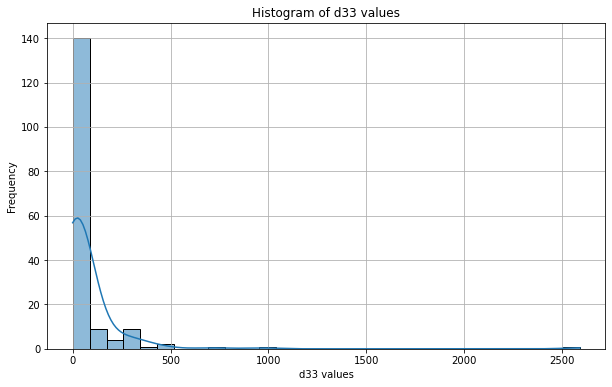

Group 1 size: 56
Group 1 mean Y: 5.479455357142856 min Y: 0.0023 max Y: 14.0543
Group 2 size: 56
Group 2 mean Y: 20.686355357142862 min Y: 14.351 max Y: 31.0167
Group 3 size: 56
Group 3 mean Y: 205.2896946428572 min Y: 32.6261 max Y: 2591.0061


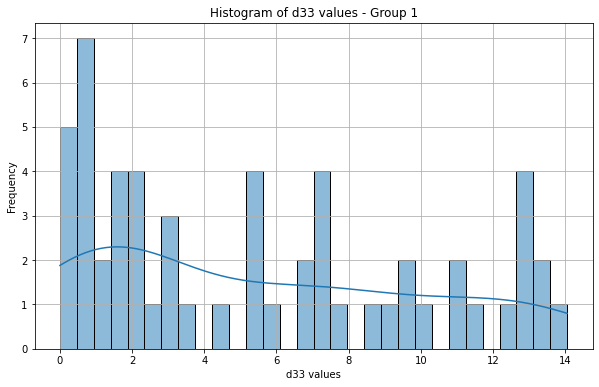

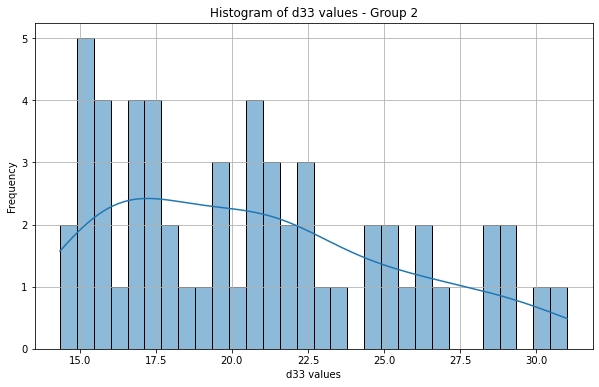

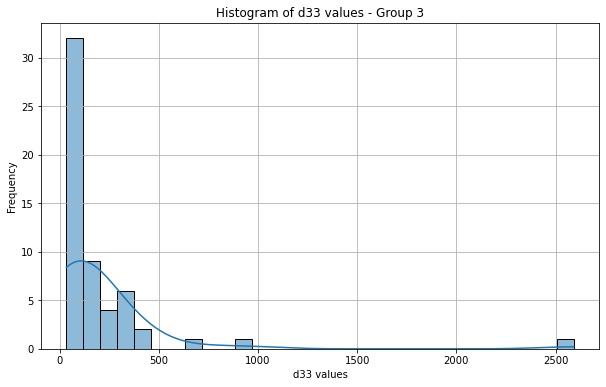

In [17]:
labelname  = "d33"
materialfeatures = [\
    "formal_charge_A-site",\
    "formal_charge_B-site",\
    "octahedra_volume_min",\
    "octahedra_volume_max",\
    "octahedra_volume_avg",\
    "octahedra_meanangle_axis_min",\
    "octahedra_meanangle_axis_max",\
    "octahedra_meanangle_axis_avg",\
    "tilt_BOB_ip_min",\
    "tilt_BOB_ip_max",\
    "tilt_BOB_ip_avg",\
    "tilt_BOB_oop_min",\
    "tilt_BOB_oop_max",\
    "tilt_BOB_oop_avg",\
    "spageGroup_no",\
    "lattice_a",\
    "lattice_b",\
    "lattice_c",\
    "lattice_alfa",\
    "lattice_beta",\
    "lattice_gamma",\
    "volume_uc",\
    "volume_uc_per_atom",\
    "volume_ratio_ucVSoctahedra",\
    "tolerance_factor",\
    "ratio_outVSinplaneAVG",\
    "ratio_outVSinplanemin",\
    "ratio_outVSinplanemax",\
    "bond_lengthAA_min",\
    "bond_lengthAA_max",\
    "bond_lengthAA_avg",\
    "bond_lengthAB_min",\
    "bond_lengthAB_max",\
    "bond_lengthAB_avg",\
    "bond_lengthAO_min",\
    "bond_lengthAO_max",\
    "bond_lengthAO_avg",\
    "bond_lengthBO_min",\
    "bond_lengthBO_max",\
    "bond_lengthBO_avg",\
    "bond_lengthBB_min",\
    "bond_lengthBB_max",\
    "bond_lengthBB_avg",\
    "is_magnetic",\
    "is_metallic",\
    "is_perovskite"]
atomicfeatures = [\
    "A_Z",\
    "A_group",\
    "A_valence",\
    "A_vec/Z",\
    "A_n_d",\
    "A_atomic_volume pymatgen [cm3/mol]",\
    "A_Rdce [Å]",\
    "A_Rdve  [Å]",\
    "A_rs_max  [Å]",\
    "A_rd_max  [Å]",\
    "A_IE ionization energy [eV]",\
    "A_EA electron_affinity [eV]",\
    "A_Mulliken  [eV]",\
    "A_Pauling",\
    "A_Martynov-Batsanov [ev^-1/2]",\
    "A_atomic_radius_rahm  [pm]",\
    "A_vdw_radius_uff [pm]",\
    "A_ionic_radius",\
    "B_Z",\
    "B_group",\
    "B_valence",\
    "B_vec/Z",\
    "B_n_d",\
    "B_atomic_volume pymatgen [cm3/mol]",\
    "B_Rdce [Å]",\
    "B_Rdve  [Å]",\
    "B_rs_max  [Å]",\
    "B_rd_max  [Å]",\
    "B_IE ionization energy [eV]",\
    "B_EA electron_affinity [eV]",\
    "B_Mulliken  [eV]",\
    "B_Pauling",\
    "B_Martynov-Batsanov [ev^-1/2]",\
    "B_atomic_radius_rahm  [pm]",\
    "B_vdw_radius_uff [pm]",\
    "B_ionic_radius"]

Y = df[labelname].abs().values
X = df[materialfeatures + atomicfeatures]
X_mat = df[materialfeatures]
X_atm = df[atomicfeatures]

print("Mean value of Y:", np.mean(Y))
print("Standard deviation of Y:", np.std(Y))
# plot histogram of Y
plt.figure(figsize=(10, 6))
sns.histplot(Y, bins=30, kde=True)
plt.title(f"Histogram of {labelname} values")
plt.xlabel(f"{labelname} values")
plt.ylabel("Frequency")
plt.grid()
plt.show()
# subdivide the data into thee gpoups based on the value of Y hving s
# ame number of samples in each group
def subdivide_data(Y, X, n_groups=3):
    df = pd.DataFrame(X)
    df['Y'] = Y
    df_sorted = df.sort_values(by='Y').reset_index(drop=True)
    group_size = len(df_sorted) // n_groups
    groups = []
    
    for i in range(n_groups):
        start_idx = i * group_size
        end_idx = (i + 1) * group_size if i < n_groups - 1 else len(df_sorted)
        groups.append(df_sorted.iloc[start_idx:end_idx])
    
    return groups

# Subdivide the data into three groups
groups = subdivide_data(Y, X, n_groups=3)
# Print the number of samples in each group
for i, group in enumerate(groups):
    print(f"Group {i + 1} size: {len(group)}")
    print(f"Group {i + 1} mean Y: {group['Y'].mean()} min Y: {group['Y'].min()} max Y: {group['Y'].max()}")
    #print(group.describe())
# Plot the distribution of Y in each group
for i, group in enumerate(groups):
    plt.figure(figsize=(10, 6))
    sns.histplot(group['Y'], bins=30, kde=True)
    plt.title(f"Histogram of {labelname} values - Group {i + 1}")
    plt.xlabel(f"{labelname} values")
    plt.ylabel("Frequency")
    plt.grid()
    plt.show()

Number of values in class 0:  28
Number of values in class 1:  99
min label:  0.0023
max label:  2591.0061


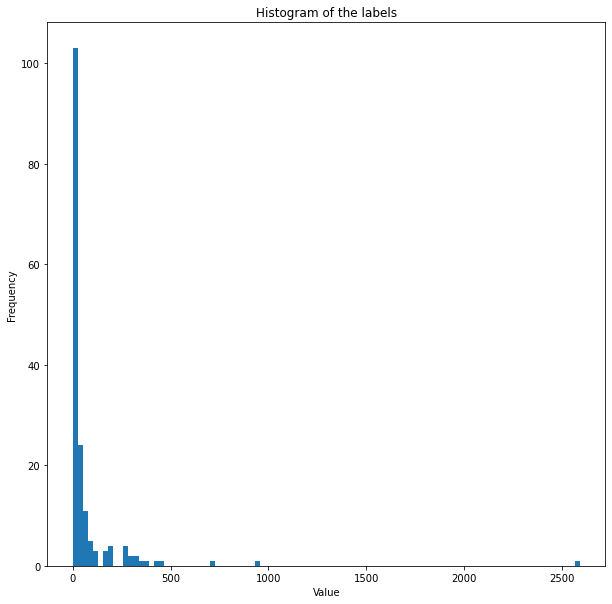

In [18]:
# classification label for the dataset splitted by value
Y_class = []
#firstcut = 14.0543
#secondcut = 31.0167
#for y in Y:
#    if y <= firstcut:
#        Y_class.append(0)
#    elif y > firstcut and y <= secondcut:
#        Y_class.append(1)
#    else:
#        Y_class.append(2)

for y in Y:
    if y <= 5.0:
        Y_class.append(0)
    elif y > 5.0 and y <= 50.0:
        Y_class.append(1)
    else:
        Y_class.append(2)

Y_class = np.array(Y_class)
# print the number of values for each class
print("Number of values in class 0: ", len(Y_class[Y_class==0]))
print("Number of values in class 1: ", len(Y_class[Y_class==1]))
#print("Number of values in class 2: ", len(Y_class[Y_class==2]))

print("min label: ", min(Y))
print("max label: ", max(Y))
#print("Number of values     lower than 14.0543: ", len(Y[Y<14.0543]))
#print("Number of values   greater than 14.0543 and lower than 31.0167: ", len(Y[(Y>14.0543) & (Y<31.0167)]))
#print("Number of values   greater than 31.0167: ", len(Y[Y>31.0167]))

plt.figure(figsize=(10, 10))
plt.hist(Y, bins=100)
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.title("Histogram of the labels")
plt.show()

In [19]:
CORRCUT = 0.95
corr = X.corr()
upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))
for i in range(upper.shape[0]):
    for j in range(upper.shape[1]):
        if upper.iloc[i,j] > CORRCUT:
            print("%30s %30s %5.2f"%(upper.columns[i], \
                                     upper.columns[j], \
                                        upper.iloc[i,j]))

to_drop = [column for column in upper.columns if any(upper[column] >CORRCUT)]
print("Dropping features: ", to_drop)
X = X.drop(X[to_drop], axis=1)

corr_mat = X_mat.corr()
upper = corr_mat.where(np.triu(np.ones(corr_mat.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > CORRCUT)]
print("Dropping features: ", to_drop)
X_mat = X_mat.drop(X_mat[to_drop], axis=1)

corr_atm = X_atm.corr()
upper = corr_atm.where(np.triu(np.ones(corr_atm.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > CORRCUT)]
print("Dropping features: ", to_drop)
X_atm = X_atm.drop(X_atm[to_drop], axis=1)

          octahedra_volume_min           octahedra_volume_max  1.00
          octahedra_volume_min           octahedra_volume_avg  1.00
          octahedra_volume_min             volume_uc_per_atom  0.99
          octahedra_volume_min     volume_ratio_ucVSoctahedra  0.96
          octahedra_volume_min              bond_lengthAA_avg  0.98
          octahedra_volume_min              bond_lengthBO_avg  0.98
          octahedra_volume_min              bond_lengthBB_avg  0.98
          octahedra_volume_max           octahedra_volume_avg  1.00
          octahedra_volume_max             volume_uc_per_atom  0.99
          octahedra_volume_max     volume_ratio_ucVSoctahedra  0.96
          octahedra_volume_max              bond_lengthAA_avg  0.97
          octahedra_volume_max              bond_lengthBO_avg  0.98
          octahedra_volume_max              bond_lengthBB_avg  0.98
          octahedra_volume_avg             volume_uc_per_atom  0.99
          octahedra_volume_avg     volume_ratio_

In [20]:
from sklearn.preprocessing import StandardScaler

X_df = X 
X_mat_df = X_mat
X_atm_df = X_atm
X = StandardScaler().fit_transform(X)
X_mat = StandardScaler().fit_transform(X_mat)
X_atm = StandardScaler().fit_transform(X_atm)

In [21]:
from sklearn.decomposition import PCA

sumofvar = []
ratioofvar = []

first80 = False
firtt90 = False
numofcomptouse = 0
for nc in range(1, X.shape[1]):
    pca = PCA(n_components=nc)
    pcs = pca.fit_transform(X)
    sumofvar.append(sum(pca.explained_variance_ratio_))
    #print("Explained variance ratio for ", nc, " components: ", pca.explained_variance_ratio_)
    ratioofvar.append(pca.explained_variance_ratio_[-1])
    if sumofvar[-1] > 0.8 and not first80:
        print("Number of components for 80% explained variance: ", nc, " of ", X.shape[1])
        first80 = True
    if sumofvar[-1] > 0.9 and not firtt90:
        print("Number of components for 90% explained variance: ", nc, " of ", X.shape[1])
        firtt90 = True
        numofcomptouse = nc
    #print("Explained variance ratio for ", nc, " components: ", pca.explained_variance_ratio_)
    #print("Explained variance for ", nc, " components: ", pca.explained_variance_)
    #print("Sum of explained variance for ", nc, " components: ", sum(pca.explained_variance_ratio_))

"""
plt.figure(figsize=(10, 5))
plt.plot(sumofvar)
plt.xlabel("Number of components")
plt.ylabel("Explained variance")
plt.title("Explained variance ratio")
plt.show()

# plot the explained variance ratio
plt.figure(figsize=(10, 5))
plt.plot(ratioofvar)
plt.xlabel("Number of components")
plt.ylabel("Explained variance")
plt.title("Explained variance ratio")
plt.show()
"""

first80 = False
firtt90 = False
numofcomptouse_mat = 0
sumofvar = []
ratioofvar = []
for nc in range(1, X_mat.shape[1]):
    pca = PCA(n_components=nc)
    pcs = pca.fit_transform(X_mat)
    sumofvar.append(sum(pca.explained_variance_ratio_))
    #print("Explained variance ratio for ", nc, " components: ", pca.explained_variance_ratio_)
    ratioofvar.append(pca.explained_variance_ratio_[-1])
    if sumofvar[-1] > 0.8 and not first80:
        print("Number of components for 80% explained variance: ", nc, " of ", X_mat.shape[1])
        first80 = True
    if sumofvar[-1] > 0.9 and not firtt90:
        print("Number of components for 90% explained variance: ", nc, " of ", X_mat.shape[1])
        firtt90 = True
        numofcomptouse_mat = nc

first80 = False
firtt90 = False
numofcomptouse_atm = 0
sumofvar = []
ratioofvar = []

for nc in range(1, X_atm.shape[1]):
    pca = PCA(n_components=nc)
    pcs = pca.fit_transform(X_atm)
    sumofvar.append(sum(pca.explained_variance_ratio_))
    #print("Explained variance ratio for ", nc, " components: ", pca.explained_variance_ratio_)
    ratioofvar.append(pca.explained_variance_ratio_[-1])
    if sumofvar[-1] > 0.8 and not first80:
        print("Number of components for 80% explained variance: ", nc, " of ", X_atm.shape[1])
        first80 = True
    if sumofvar[-1] > 0.9 and not firtt90:
        print("Number of components for 90% explained variance: ", nc, " of ", X_atm.shape[1])
        firtt90 = True
        numofcomptouse_atm = nc

Number of components for 80% explained variance:  10  of  71
Number of components for 90% explained variance:  16  of  71
Number of components for 80% explained variance:  7  of  35
Number of components for 90% explained variance:  11  of  35
Number of components for 80% explained variance:  6  of  35
Number of components for 90% explained variance:  9  of  35


In [22]:
# loeading plot for the first components
pca = PCA(n_components=numofcomptouse)
pcs = pca.fit_transform(X)
loading = pca.components_
loading = np.transpose(loading)
print("Loading shape: ", loading.shape)

usecomps = 4

for ncomp in range(usecomps):
    print("Explained variance for component ", ncomp+1, \
          ": ", pca.explained_variance_ratio_[ncomp])
    #print(loading[:, ncomp])
loading = pd.DataFrame(loading, columns=["PC"+str(i) for i in range(1, numofcomptouse+1)])
loading["Feature"] = X_df.columns
loading = loading.set_index("Feature")
loading = loading.abs()
loading = loading.sort_values(by="PC1", ascending=False)

#loading.plot.bar(stacked=True, figsize=(20, 10))
#plt.show()

# print the most important features for the first 16 components
for ncomp in range(usecomps):
    print("Most important features for component ", ncomp+1)
    print(loading["PC"+str(ncomp+1)].head(10))


Loading shape:  (71, 16)
Explained variance for component  1 :  0.230054265153324
Explained variance for component  2 :  0.1335491632343063
Explained variance for component  3 :  0.1044012321224784
Explained variance for component  4 :  0.07887204001936836
Most important features for component  1
Feature
octahedra_volume_min                  0.245683
B_ionic_radius                        0.241697
B_atomic_volume pymatgen [cm3/mol]    0.231411
bond_lengthAB_avg                     0.229226
bond_lengthBO_min                     0.228452
B_atomic_radius_rahm  [pm]            0.217525
bond_lengthAA_max                     0.216692
bond_lengthBB_min                     0.208197
bond_lengthAO_max                     0.202275
bond_lengthAB_max                     0.195993
Name: PC1, dtype: float64
Most important features for component  2
Feature
octahedra_volume_min                  0.002691
B_ionic_radius                        0.020939
B_atomic_volume pymatgen [cm3/mol]    0.009411
bond_len

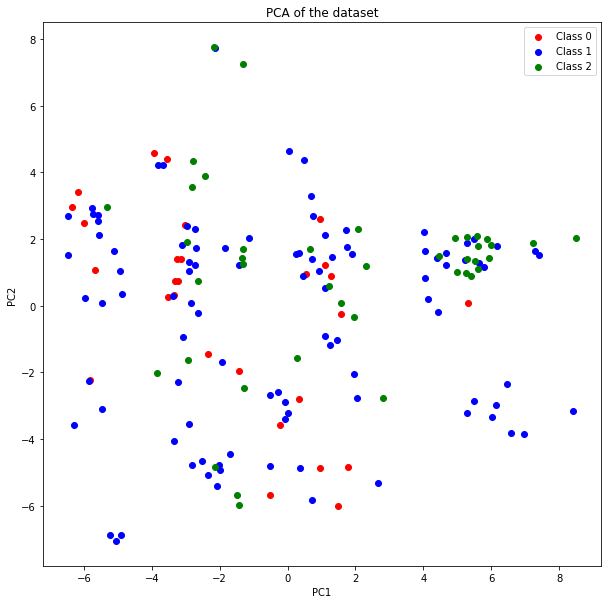

In [23]:
# plot a scatterplot of the first two components using different color for each class
plt.figure(figsize=(10, 10))
plt.scatter(pcs[Y_class==0, 0], pcs[Y_class==0, 1], c="red", label="Class 0")
plt.scatter(pcs[Y_class==1, 0], pcs[Y_class==1, 1], c="blue", label="Class 1")
plt.scatter(pcs[Y_class==2, 0], pcs[Y_class==2, 1], c="green", label="Class 2")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.title("PCA of the dataset")
plt.show()

Text(0.5, 0.92, 'PCA of the dataset')

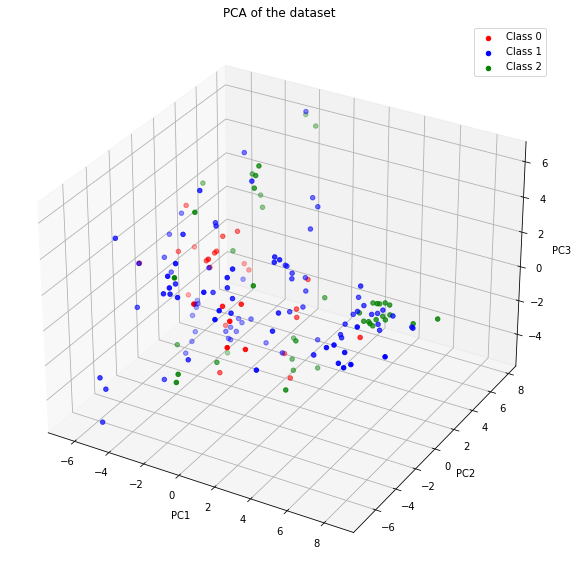

In [24]:
# plot a scatterplot of the first three components using different color for each class
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pcs[Y_class==0, 0], pcs[Y_class==0, 1], pcs[Y_class==0, 2], c="red", label="Class 0")
ax.scatter(pcs[Y_class==1, 0], pcs[Y_class==1, 1], pcs[Y_class==1, 2], c="blue", label="Class 1")
ax.scatter(pcs[Y_class==2, 0], pcs[Y_class==2, 1], pcs[Y_class==2, 2], c="green", label="Class 2")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
plt.legend()
plt.title("PCA of the dataset")

In [25]:
# loeading plot for the first components
pca = PCA(n_components=numofcomptouse_mat)
pcs = pca.fit_transform(X_mat)
loading = pca.components_
loading = np.transpose(loading)
print("Loading shape: ", loading.shape)

usecomps = 4

for ncomp in range(usecomps):
    print("Explained variance for component ", ncomp+1, \
          ": ", pca.explained_variance_ratio_[ncomp])
    #print(loading[:, ncomp])
loading = pd.DataFrame(loading, columns=["PC"+str(i) for i in range(1, numofcomptouse_mat+1)])
loading["Feature"] = X_mat_df.columns
loading = loading.set_index("Feature")
loading = loading.abs()
loading = loading.sort_values(by="PC1", ascending=False)

#loading.plot.bar(stacked=True, figsize=(20, 10))
#plt.show()

# print the most important features for the first 16 components
for ncomp in range(usecomps):
    print("Most important features for component ", ncomp+1)
    print(loading["PC"+str(ncomp+1)].head(10))

Loading shape:  (35, 11)
Explained variance for component  1 :  0.29969841968653244
Explained variance for component  2 :  0.14146780919784646
Explained variance for component  3 :  0.12608524572027127
Explained variance for component  4 :  0.07903021308391359
Most important features for component  1
Feature
octahedra_volume_min    0.302467
bond_lengthAB_avg       0.286818
bond_lengthBO_min       0.282936
bond_lengthAA_max       0.282723
bond_lengthAB_max       0.263966
bond_lengthBO_max       0.250676
bond_lengthAO_max       0.248866
bond_lengthBB_min       0.247281
tilt_BOB_ip_avg         0.226960
tilt_BOB_ip_max         0.211478
Name: PC1, dtype: float64
Most important features for component  2
Feature
octahedra_volume_min    0.167444
bond_lengthAB_avg       0.156899
bond_lengthBO_min       0.134517
bond_lengthAA_max       0.089162
bond_lengthAB_max       0.050968
bond_lengthBO_max       0.037753
bond_lengthAO_max       0.100780
bond_lengthBB_min       0.255135
tilt_BOB_ip_avg      

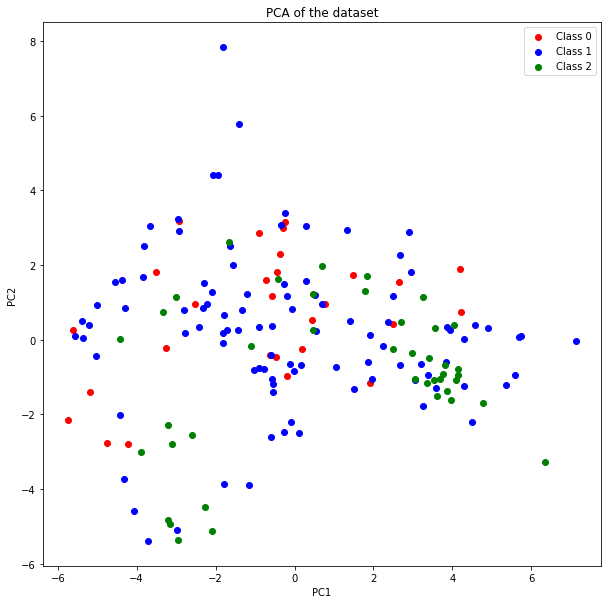

In [26]:
# plot a scatterplot of the first two components using different color for each class
plt.figure(figsize=(10, 10))
plt.scatter(pcs[Y_class==0, 0], pcs[Y_class==0, 1], c="red", label="Class 0")
plt.scatter(pcs[Y_class==1, 0], pcs
            [Y_class==1, 1], c="blue", label="Class 1")
plt.scatter(pcs[Y_class==2, 0], pcs
            [Y_class==2, 1], c="green", label="Class 2")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.title("PCA of the dataset")
plt.show()


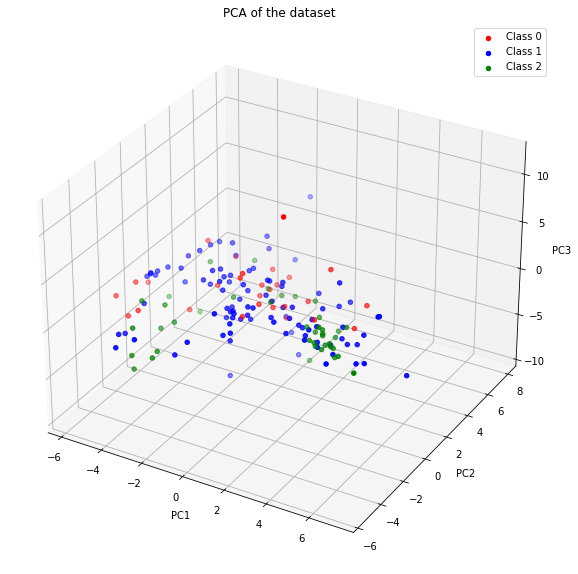

In [27]:
# plot a scatterplot of the first three components using different color for each class
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pcs[Y_class==0, 0], pcs[Y_class==0, 1], pcs[Y_class==0, 2], c="red", label="Class 0")
ax.scatter(pcs[Y_class==1, 0], pcs[Y_class==1, 1], pcs[Y_class==1, 2], c="blue", label="Class 1")
ax.scatter(pcs[Y_class==2, 0], pcs[Y_class==2, 1], pcs[Y_class==2, 2], c="green", label="Class 2")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
plt.legend()
plt.title("PCA of the dataset")
plt.show()


In [28]:
# loeading plot for the first components
pca = PCA(n_components=numofcomptouse_atm)
pcs = pca.fit_transform(X_atm)
loading = pca.components_
loading = np.transpose(loading)
print("Loading shape: ", loading.shape)

usecomps = 4

for ncomp in range(usecomps):
    print("Explained variance for component ", ncomp+1, \
          ": ", pca.explained_variance_ratio_[ncomp])
    #print(loading[:, ncomp])
loading = pd.DataFrame(loading, columns=["PC"+str(i) for i in 
                                         range(1, numofcomptouse_atm+1)])
loading["Feature"] = X_atm_df.columns
loading = loading.set_index("Feature")
loading = loading.abs()
loading = loading.sort_values(by="PC1", ascending=False)

#loading.plot.bar(stacked=True, figsize=(20, 10))
#plt.show()

# print the most important features for the first 16 components
for ncomp in range(usecomps):
    print("Most important features for component ", ncomp+1)
    print(loading["PC"+str(ncomp+1)].head(10))

Loading shape:  (35, 9)
Explained variance for component  1 :  0.2357460944811427
Explained variance for component  2 :  0.20376567323468572
Explained variance for component  3 :  0.1568867379542177
Explained variance for component  4 :  0.10175556721893124
Most important features for component  1
Feature
B_ionic_radius                        0.261472
B_atomic_volume pymatgen [cm3/mol]    0.259739
B_valence                             0.254251
B_Pauling                             0.246063
B_atomic_radius_rahm  [pm]            0.241677
B_IE ionization energy [eV]           0.229577
B_Rdve  [Å]                           0.218112
B_Mulliken  [eV]                      0.214814
B_rs_max  [Å]                         0.211651
A_atomic_radius_rahm  [pm]            0.205298
Name: PC1, dtype: float64
Most important features for component  2
Feature
B_ionic_radius                        0.131077
B_atomic_volume pymatgen [cm3/mol]    0.125056
B_valence                             0.106439
B_Pauli

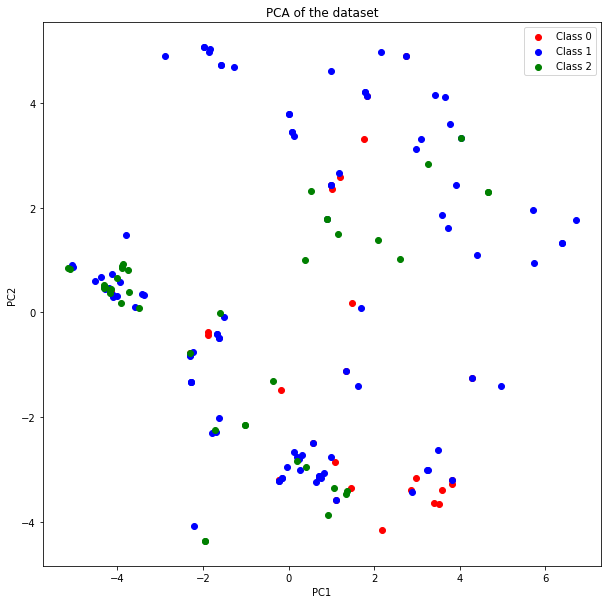

In [29]:
# plot a scatterplot of the first two components using different color for each class
plt.figure(figsize=(10, 10))
plt.scatter(pcs[Y_class==0, 0], pcs
            [Y_class==0, 1], c="red", label="Class 0")
plt.scatter(pcs[Y_class==1, 0], pcs
            [Y_class==1, 1], c="blue", label="Class 1")
plt.scatter(pcs[Y_class==2, 0], pcs
            [Y_class==2, 1], c="green", label="Class 2")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.title("PCA of the dataset")
plt.show()

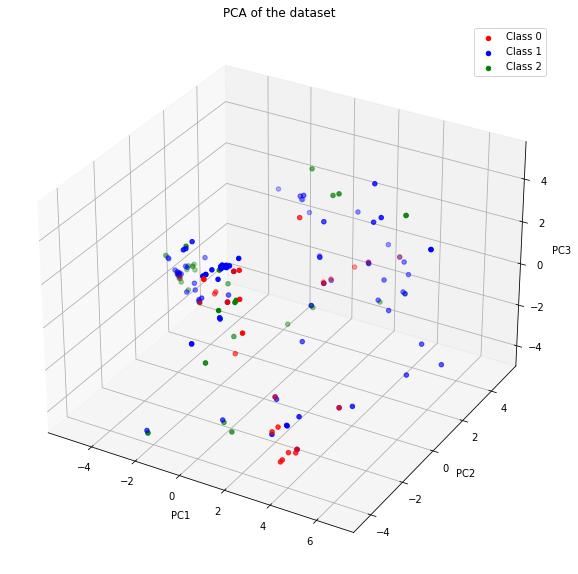

In [30]:
# plot a scatterplot of the first three components using different color for each class
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pcs[Y_class==0, 0], pcs
            [Y_class==0, 1], pcs
            [Y_class==0, 2], c="red", label="Class 0")
ax.scatter(pcs[Y_class==1, 0], pcs
            [Y_class==1, 1], pcs
            [Y_class==1, 2], c="blue", label="Class 1")
ax.scatter(pcs[Y_class==2, 0], pcs
            [Y_class==2, 1], pcs
            [Y_class==2, 2], c="green", label="Class 2")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
plt.legend()
plt.title("PCA of the dataset")
plt.show()
